# TASK 4:

## Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.


### Dataset used: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
%matplotlib inline

In [3]:
data= pd.read_csv(r"C:\\Users\\PC\\Documents\\prodigy\\twitter_trainingt3.csv",names=['Tweet_ID','entity','sentiment','Tweet_content'])
data

Tweet_ID       entity sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   
74681      9200       Nvidia  Positive   

                                           Tweet_content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
data.describe(include='all')

Tweet_ID                entity sentiment Tweet_content
count   74682.000000                 74682     74682         73996
unique           NaN                    32         4         69489
top              NaN  TomClancysRainbowSix  Negative              
freq             NaN                  2400     22542           172
mean     6432.586165                   NaN       NaN           NaN
std      3740.427870                   NaN       NaN           NaN
min         1.000000                   NaN       NaN           NaN
25%      3195.000000                   NaN       NaN           NaN
50%      6422.000000                   NaN       NaN           NaN
75%      9601.000000                   NaN       NaN           NaN
max     13200.000000                   NaN       NaN           NaN

In [6]:
data.isnull().sum()

Tweet_ID           0
entity             0
sentiment          0
Tweet_content    686
dtype: int64

In [7]:
data.dropna(inplace=True)

In [9]:
data.loc[data['sentiment'] == 'Irrelevant','sentiment'] = 'Neutral'

In [16]:
data

Tweet_ID       entity sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   
74681      9200       Nvidia  Positive   

                                           Tweet_content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[73996 rows x 4 columns]

## EDA

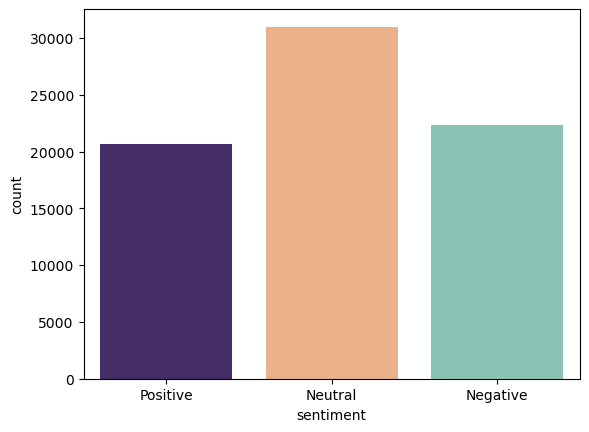

In [32]:
sns.countplot(x='sentiment',data=data,palette=['#432371','#FAAE7B','#7fcdbb'],legend=False,hue='sentiment')
plt.show()

In [34]:
from wordcloud import WordCloud

(-0.5, 199.5, 99.5, -0.5)

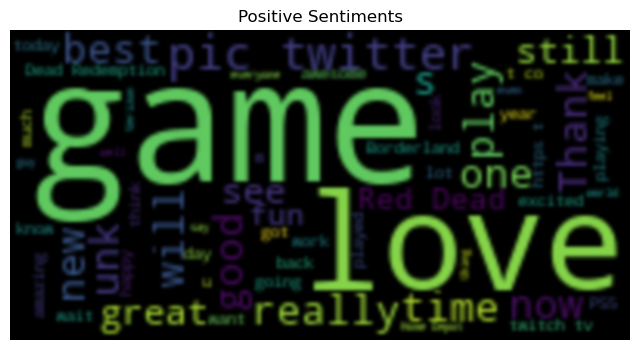

In [40]:
positive_tweets=data[data['sentiment']=='Positive']
positive_text = ''.join(positive_tweets['Tweet_content'])
worldcloud=WordCloud(width=200 , height=100).generate(positive_text)
plt.figure(figsize=(8,6))
plt.imshow(worldcloud,interpolation='bicubic')
plt.title('Positive Sentiments')
plt.axis('off')

(-0.5, 199.5, 99.5, -0.5)

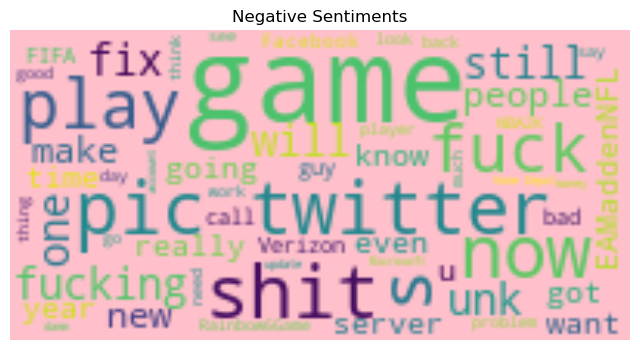

In [38]:
negative_tweets=data[data['sentiment']=='Negative']
negative_text = ''.join(negative_tweets['Tweet_content'])
worldcloud=WordCloud(width=200 , height=100,background_color='pink').generate(negative_text)
plt.figure(figsize=(8,6))
plt.imshow(worldcloud,interpolation='bilinear')
plt.title('Negative Sentiments')
plt.axis('off')

(-0.5, 199.5, 99.5, -0.5)

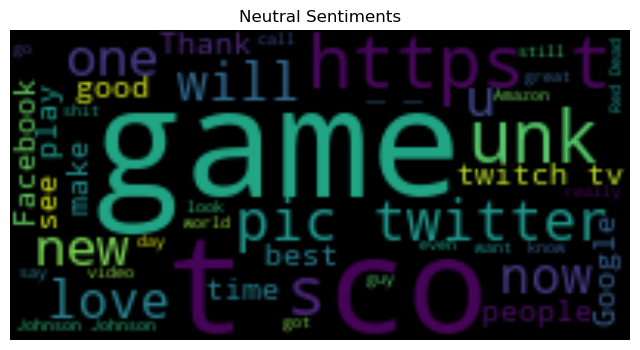

In [46]:
neutral_tweets=data[data['sentiment']=='Neutral']
neutral_text = ''.join(neutral_tweets['Tweet_content'])
worldcloud=WordCloud(width=200 , height=100).generate(neutral_text)
plt.figure(figsize=(8,6))
plt.imshow(worldcloud,interpolation='bilinear')
plt.title('Neutral Sentiments')
plt.axis('off')

In [48]:
data['entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [52]:
import plotly.express as px

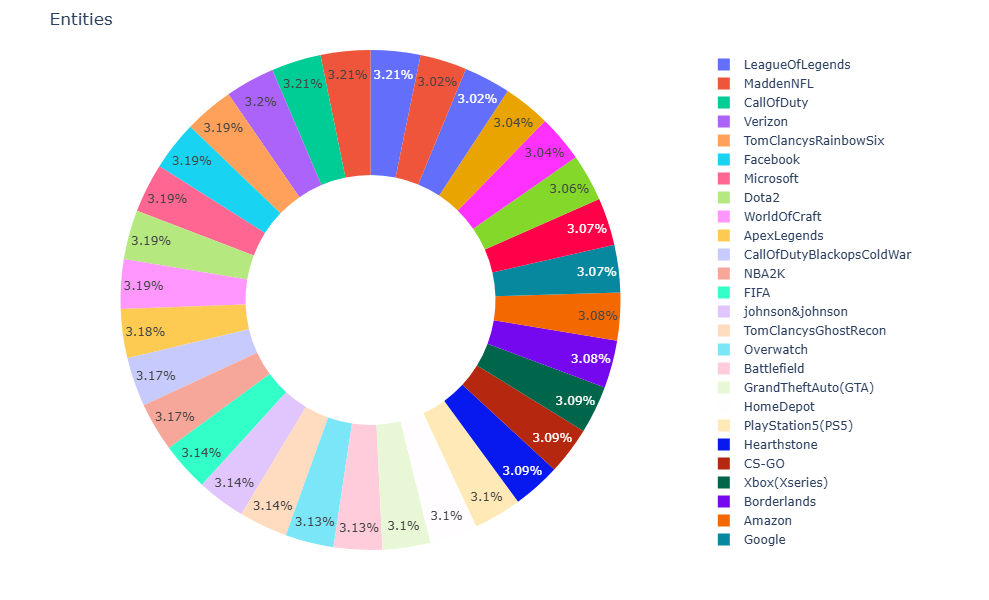

In [54]:
fig=px.pie(data,names='entity',hole=0.5,title='Entities')
fig.update_layout(autosize=False,width=800,height=600,margin=dict(l=50,r=50,t=50,b=50))

In [56]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [74]:
#nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [76]:
def text_process(content):
    nopunc=[char for char in content if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [78]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

## Using bag of words(bow) method

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


In [156]:
x_train, x_test, y_train, y_test = train_test_split(data['Tweet_content'],data['sentiment'], test_size=0.33,random_state=42)

In [171]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])


In [172]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FDF8F97240>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [170]:
predictions=pipeline.predict(x_test)

In [168]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.79      0.80      0.80      7271
     Neutral       0.77      0.87      0.82     10385
    Positive       0.86      0.68      0.76      6763

    accuracy                           0.80     24419
   macro avg       0.81      0.78      0.79     24419
weighted avg       0.80      0.80      0.80     24419



# INFERENCE

### The model has overall accuracy of 80%
### There are more reviews that are neutral in terms of precision,recall and F1- score than in positive and negative review